In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import ttest_ind_from_stats
import seaborn as sn
from sklearn.linear_model import LogisticRegression



# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [2]:
tennis = pd.read_csv('data/tennis.csv')
tennis.dropna(inplace=True)

In [3]:
x = pd.get_dummies(tennis.surface,drop_first=True)
y = tennis['player1 total points won']
X = sm.add_constant(x)
est = sm.OLS(y,x).fit(cov_type='HC2')
print(est.summary())

                                    OLS Regression Results                                   
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.865
Model:                                  OLS   Adj. R-squared (uncentered):              0.865
Method:                       Least Squares   F-statistic:                              2790.
Date:                      Sat, 23 Jan 2021   Prob (F-statistic):                        0.00
Time:                              08:51:33   Log-Likelihood:                         -5009.2
No. Observations:                      1016   AIC:                                  1.003e+04
Df Residuals:                          1012   BIC:                                  1.005e+04
Df Model:                                 4                                                  
Covariance Type:                        HC2                                                  
                     coef    std err          z      P>|z|  

                                    OLS Regression Results                                   
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.865
Model:                                  OLS   Adj. R-squared (uncentered):              0.865
Method:                       Least Squares   F-statistic:                              2790.
Date:                      Wed, 20 Jan 2021   Prob (F-statistic):                        0.00
Time:                              21:56:53   Log-Likelihood:                         -5009.2
No. Observations:                      1016   AIC:                                  1.003e+04
Df Residuals:                          1012   BIC:                                  1.005e+04
Df Model:                                 4                                                  
Covariance Type:                        HC2                                                  
                     coef    std err          z      P>|z|  

In [32]:
ttest_ind_from_stats(mean1=98.6935, std1=2.972, nobs1=1016,
                     mean2=88.0880, std2=2.071, nobs2=1016)


Ttest_indResult(statistic=93.32132180943172, pvalue=0.0)

In [27]:
est1 = sm.OLS(y,X).fit(cov_type='HC2')
print(est1.summary())

                               OLS Regression Results                               
Dep. Variable:     player1 total points won   R-squared:                       0.048
Model:                                  OLS   Adj. R-squared:                  0.044
Method:                       Least Squares   F-statistic:                     16.93
Date:                      Wed, 20 Jan 2021   Prob (F-statistic):           1.91e-13
Time:                              21:18:41   Log-Likelihood:                -4793.2
No. Observations:                      1016   AIC:                             9596.
Df Residuals:                          1011   BIC:                             9621.
Df Model:                                 4                                         
Covariance Type:                        HC2                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

In [ ]:
#1.1 after adding the constanct when the coef is high means that he is perform better Outdoor: Grass and Outdoor: Clay with the highest coef 
#for the P valu eis high 85% accurate 

#1.2 we should not add the constant because it will affect r-quared and the p value


#

In [45]:
test = ttest_ind_from_stats(mean1=15.0, std1=1.3, nobs1=130,
                     mean2=12.0, std2=5.4, nobs2=130)

In [46]:
test

Ttest_indResult(statistic=6.15836388215444, pvalue=2.802547462952562e-09)

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [65]:
titanic = sn.load_dataset('titanic')
titanic.dropna(inplace=True)

In [10]:
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1           1       1  female  38.0      1      0  71.2833        C  First   
3           1       1  female  35.0      1      0  53.1000        S  First   
6           0       1    male  54.0      0      0  51.8625        S  First   
10          1       3  female   4.0      1      1  16.7000        S  Third   
11          1       1  female  58.0      0      0  26.5500        S  First   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
871         1       1  female  47.0      1      1  52.5542        S  First   
872         0       1    male  33.0      0      0   5.0000        S  First   
879         1       1  female  56.0      0      1  83.1583        C  First   
887         1       1  female  19.0      0      0  30.0000        S  First   
889         1       1    male  26.0      0      0  30.0000        C  First   

       who  adult_male deck  embark_town alive  alone  
1    wo

In [7]:
x = pd.get_dummies(titanic['class'],drop_first=True)
y = titanic.fare
X = sm.add_constant(x)
est1 = sm.OLS(y,x).fit(cov_type='HC2')
print(est1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   fare   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                              73.55
Date:                Fri, 22 Jan 2021   Prob (F-statistic):                    4.51e-24
Time:                        18:03:55   Log-Likelihood:                         -1113.1
No. Observations:                 182   AIC:                                      2230.
Df Residuals:                     180   BIC:                                      2237.
Df Model:                           2                                                  
Covariance Type:                  HC2                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [8]:
titanic.alone = titanic.alone.map({True: 1, False: 0})
#titanic.sex = titanic.sex.map({'male': 1, 'female': 0})


In [68]:
#titanic['class'].unique()
titanic['who_class'] =  titanic.who + '_' + titanic.pclass.astype(str)

In [69]:
titanic.who_class.unique()

array(['woman_1', 'man_1', 'child_3', 'man_2', 'woman_2', 'man_3',
       'child_2', 'woman_3', 'child_1'], dtype=object)

In [70]:
x = pd.get_dummies(titanic.who_class,drop_first=True)
y = titanic.fare
X = sm.add_constant(x)
est2 = sm.OLS(y,x).fit(cov_type='HC2')
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   fare   R-squared (uncentered):                   0.536
Model:                            OLS   Adj. R-squared (uncentered):              0.515
Method:                 Least Squares   F-statistic:                              869.7
Date:                Fri, 22 Jan 2021   Prob (F-statistic):                   5.45e-136
Time:                        18:53:11   Log-Likelihood:                         -1043.4
No. Observations:                 182   AIC:                                      2103.
Df Residuals:                     174   BIC:                                      2128.
Df Model:                           8                                                  
Covariance Type:                  HC2                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [28]:

titanic = sn.load_dataset('titanic')
titanic.dropna(inplace=True)
print("Dimensions of train: {}".format(titanic.shape))


Dimensions of train: (182, 15)


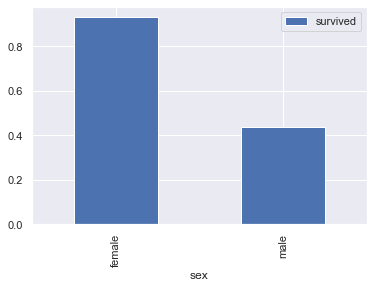

In [31]:
sex_pivot = titanic.pivot_table(index="sex",values="survived")
sex_pivot.plot.bar()
plt.show()

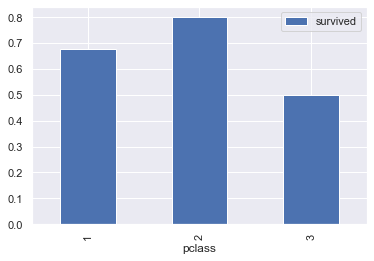

In [32]:
class_pivot = titanic.pivot_table(index="pclass",values="survived")
class_pivot.plot.bar()
plt.show()

In [34]:
titanic.age.describe()

count    182.000000
mean      35.623187
std       15.671615
min        0.920000
25%       24.000000
50%       36.000000
75%       47.750000
max       80.000000
Name: age, dtype: float64

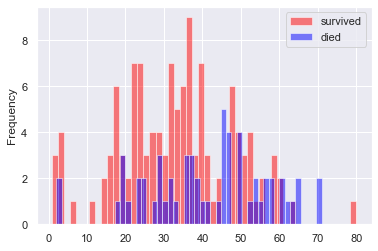

In [36]:
survived = titanic[titanic["survived"] == 1]
died = titanic[titanic["survived"] == 0]
survived["age"].plot.hist(alpha=0.5,color='red',bins=50)
died["age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['survived','died'])
plt.show()

In [37]:
def process_age(df,cut_points,label_names):
    df["age"] = df["age"].fillna(-0.5)
    df["age_categories"] = pd.cut(df["age"],cut_points,labels=label_names)
    return df

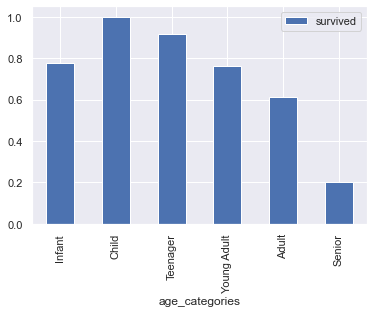

In [40]:
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
titanic = process_age(titanic,cut_points,label_names)


pivot = titanic.pivot_table(index="age_categories",values='survived')
pivot.plot.bar()
plt.show()

In [42]:
titanic["pclass"].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [43]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [48]:
for column in ["pclass","sex","age_categories"]:
    titanic = create_dummies(titanic,column)
    

In [49]:
lr = LogisticRegression()

In [50]:
columns = ['pclass_2', 'pclass_3', 'sex_male']
lr.fit(titanic[columns], titanic['survived'])

LogisticRegression()

In [56]:

columns = ['pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male','age_categories_missing',
'age_categories_infant','age_categories_Child', 'age_categories_teenager','age_categories_Young_adult','age_categories_adult','age_categories_senior']

lr = LogisticRegression()
lr.fit(titanic[columns], titanic["Survived"])

In [58]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [63]:
titanic.reset_index()

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,...,pclass_3,sex_female,sex_male,age_categories_Missing,age_categories_Infant,age_categories_Child,age_categories_Teenager,age_categories_Young Adult,age_categories_Adult,age_categories_Senior
0,1,1,1,female,38.0,1,0,71.2833,C,First,...,0,1,0,0,0,0,0,0,1,0
1,3,1,1,female,35.0,1,0,53.1000,S,First,...,0,1,0,0,0,0,0,1,0,0
2,6,0,1,male,54.0,0,0,51.8625,S,First,...,0,0,1,0,0,0,0,0,1,0
3,10,1,3,female,4.0,1,1,16.7000,S,Third,...,1,1,0,0,1,0,0,0,0,0
4,11,1,1,female,58.0,0,0,26.5500,S,First,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,871,1,1,female,47.0,1,1,52.5542,S,First,...,0,1,0,0,0,0,0,0,1,0
178,872,0,1,male,33.0,0,0,5.0000,S,First,...,0,0,1,0,0,0,0,1,0,0
179,879,1,1,female,56.0,0,1,83.1583,C,First,...,0,1,0,0,0,0,0,0,1,0
180,887,1,1,female,19.0,0,0,30.0000,S,First,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
#holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

all_X = titanic[columns]
all_y = titanic['survived']

titanic_X, test_X, titanic_y, test_y = titanic_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

In [ ]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
Let’s put all of these steps together, and get our first accuracy score.

from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

In [78]:
# 2.3
from sklearn.metrics import r2_score
est4 = sm.OLS(y, x).fit_regularized(L1_wt=0)
y2 = est4.predict(x)
r2_score(y, y2)



1.0

# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [ ]:
https://www.kaggle.com/riteshpatil8998/top-49-house-pricing-using-ridge-and-lasso
https://www.kaggle.com/andreshg/house-price-eda-and-prediction


In [101]:
train_df = pd.read_csv('data/house_price.csv')

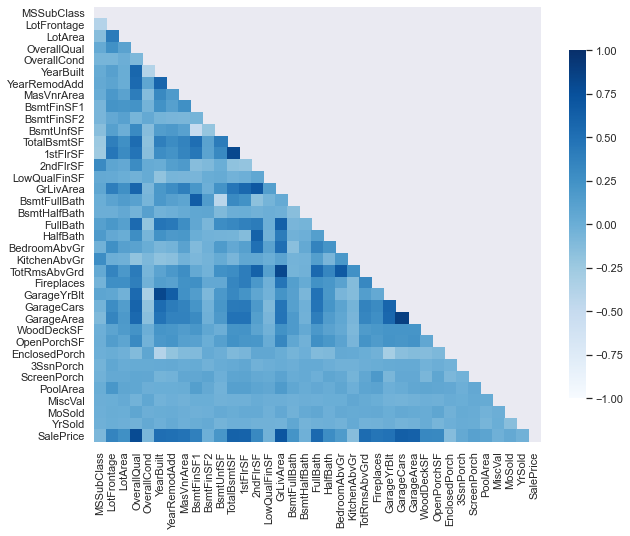

In [102]:
train_corr = train_df.drop('Id', axis=1).corr()

fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(train_corr, dtype=np.bool))
# adjust mask and df
corr = train_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(train_corr, mask=mask, annot=False, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

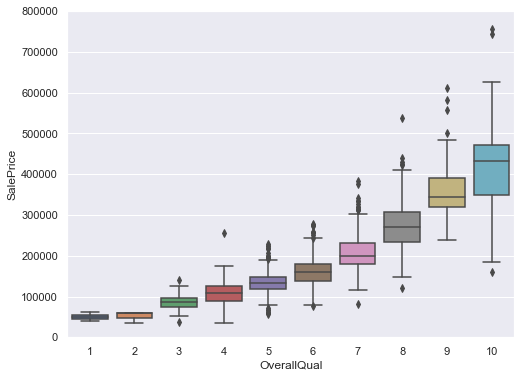

In [103]:
data = pd.concat([train_df['SalePrice'], train_df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train_df['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [107]:
import plotly.express as px
data = pd.concat([train_df['SalePrice'], train_df['TotalBsmtSF']], axis=1)
fig = px.scatter(data, x='TotalBsmtSF', y='SalePrice')
fig.show()

In [108]:
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
fig = px.scatter(data, x='GrLivArea', y='SalePrice')
fig.show()

In [109]:
train_id = train_df['Id']
train_df = train_df.drop(['Id'], axis=1)
train_df.shape

(1460, 80)

In [110]:
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4500) & (train_df['SalePrice']<300000)].index)
train_df.shape

(1458, 80)

In [113]:
# Split features and labels
y = train_df['SalePrice'].reset_index(drop=True)
train_features = train_df.drop('SalePrice', axis=1)


features = pd.concat([train_features]).reset_index(drop=True)
features.shape

(1458, 79)

In [114]:
# Some of the non-numeric predictors are stored as numbers (based on description); convert them into strings 
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['MoSold'] = features['MoSold'].astype(str)

In [116]:
y = np.log1p(y)

# plotting_3_chart(pd.DataFrame(y), 'SalePrice')

In [117]:
#missing data
total = features.isnull().sum().sort_values(ascending=False)
percent = ((features.isnull().sum() / features.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.reset_index()
missing_data.columns = ['Name', 'Total', 'Percent']
missing_data[:10]

,Name,Total,Percent
0,PoolQC,1452,99.588477
1,MiscFeature,1404,96.296296
2,Alley,1367,93.758573
3,Fence,1177,80.727023
4,FireplaceQu,690,47.325103
5,LotFrontage,259,17.764060
6,GarageCond,81,5.555556
7,GarageType,81,5.555556
8,GarageYrBlt,81,5.555556
9,GarageFinish,81,5.555556


In [118]:
def handle_missing(features):
    # Deleting vars with high missings (over 80%)
    features = features.drop(features.loc[:, (features.isna().sum() / features.count()) > 0.8].columns, axis=1)
    
    # the data description states that NA refers to typical ('Typ') values
    features['Functional'] = features['Functional'].fillna('Typ')
    
    # Replace the missing values in each of the columns below with their mode
    features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
    features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    
    # Based on the type of dwelling, we can obtain the type of 'MSZoning'
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
        
    # Group the by neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    # Finding all the categorical columns from the data
    categorical_columns = features.select_dtypes(exclude=['int64','float64']).columns
    numerical_columns = features.select_dtypes(include=['int64','float64']).columns

    # We have no particular intuition around how to fill in the rest of the categorical features
    # So we replace their missing values with None
    features[categorical_columns] = features[categorical_columns].fillna('None')
        
    # And we do the same thing for numerical features, but this time with 0s
    features[numerical_columns] = features[numerical_columns].fillna(0)
    
    return features

In [119]:
features = handle_missing(features)
features.shape

(1458, 74)

In [ ]:
# check there are no nulls
features.isna().sum().sum(

In [120]:
def add_new_vars(features):
    # simplified features
    features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

    # Adding total sqfootage features 
    features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
    features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                                   features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
    features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                                  features['EnclosedPorch'] + features['ScreenPorch'])

    # Add years scince remodel
    features['YearsSinceRemodel'] = features['YrSold'].astype(int) - features['YearRemodAdd'].astype(int)

    return features

In [121]:
features = add_new_vars(features)
features.shape

(1458, 83)

In [126]:
numerical_columns = features.select_dtypes(include=['int64','float64']).columns

skewed_features = features[numerical_columns].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew value' :skewed_features})
skewness.head(10)

,Skew value
MiscVal,24.434913
PoolArea,15.932532
HasPool,15.492067
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895


In [125]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

# from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn import metrics
from scipy import stats

from copy import deepcopy

# import h2o

In [131]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

-5546.7268   8999.864     -0.616      0.538   -2.32e+04    1.21e+04
HouseStyle__2.5Fin     -3.207e+04   1.83e+04     -1.753      0.080    -6.8e+04    3826.517
HouseStyle__2.5Unf     -1.403e+04   1.67e+04     -0.840      0.401   -4.68e+04    1.87e+04
HouseStyle__2Story     -8342.8684   7778.180     -1.073      0.284   -2.36e+04    6918.216
HouseStyle__SFoyer      -999.7205   1.16e+04     -0.086      0.931   -2.38e+04    2.18e+04
HouseStyle__SLvl       -2050.0980   1.31e+04     -0.156      0.876   -2.78e+04    2.37e+04
OverallQual__2          2.341e+04   3.02e+04      0.775      0.438   -3.58e+04    8.27e+04
OverallQual__3          5774.3982   2.77e+04      0.209      0.835   -4.86e+04    6.01e+04
OverallQual__4           1.38e+04   2.75e+04      0.502      0.616   -4.02e+04    6.78e+04
OverallQual__5          1.376e+04   2.76e+04      0.498      0.619   -4.05e+04     6.8e+04
OverallQual__6          1.721e+04   2.77e+04      0.621      0.535   -3.72e+04    7.16e+04
OverallQual__7          2.221e+04   2.77e+04      0.801      0.423   -3.22e+04    7.66e+04
OverallQual__8          3.493e+04   2.78e+04      1.255      0.210   -1.97e+04    8.95e+04
OverallQual__9          6.403e+04   2.82e+04      2.267      0.024    8603.305    1.19e+05
OverallQual__10         8.353e+04   2.92e+04      2.857      0.004    2.62e+04    1.41e+05
OverallCond__2         -2.084e+04   8.09e+04     -0.258      0.797    -1.8e+05    1.38e+05
OverallCond__3         -4.171e+04    8.1e+04     -0.515      0.607   -2.01e+05    1.17e+05
OverallCond__4         -3.068e+04   8.12e+04     -0.378      0.706    -1.9e+05    1.29e+05
OverallCond__5         -2.529e+04   8.13e+04     -0.311      0.756   -1.85e+05    1.34e+05
OverallCond__6         -1.921e+04   8.12e+04     -0.237      0.813   -1.79e+05     1.4e+05
OverallCond__7         -1.389e+04   8.11e+04     -0.171      0.864   -1.73e+05    1.45e+05
OverallCond__8           -1.2e+04   8.11e+04     -0.148      0.882   -1.71e+05    1.47e+05
OverallCond__9         -4167.3931   8.14e+04     -0.051      0.959   -1.64e+05    1.56e+05
RoofStyle__Gable        2361.4562   1.79e+04      0.132      0.895   -3.27e+04    3.74e+04
RoofStyle__Gambrel      8269.2723   1.94e+04      0.425      0.671   -2.99e+04    4.64e+04
RoofStyle__Hip          2900.8522   1.79e+04      0.162      0.871   -3.22e+04     3.8e+04
RoofStyle__Mansard      8178.7205    2.1e+04      0.389      0.698   -3.31e+04    4.95e+04
RoofStyle__Shed         9.758e+04   3.69e+04      2.647      0.008    2.53e+04     1.7e+05
RoofMatl__CompShg       2.159e+05   3.13e+05      0.689      0.491   -3.99e+05     8.3e+05
RoofMatl__Membran         3.3e+05   3.14e+05      1.050      0.294   -2.87e+05    9.47e+05
RoofMatl__Metal         2.757e+05   3.13e+05      0.880      0.379   -3.39e+05    8.91e+05
RoofMatl__Roll          2.294e+05   3.14e+05      0.730      0.466   -3.87e+05    8.46e+05
RoofMatl__Tar&Grv       2.111e+05   3.14e+05      0.673      0.501   -4.05e+05    8.27e+05
RoofMatl__WdShake       2.175e+05   3.12e+05      0.696      0.486   -3.95e+05     8.3e+05
RoofMatl__WdShngl       2.663e+05   3.13e+05      0.851      0.395   -3.47e+05     8.8e+05
Exterior1st__AsphShn    -829.9261   3.06e+04     -0.027      0.978   -6.09e+04    5.92e+04
Exterior1st__BrkComm    4402.2215   2.71e+04      0.162      0.871   -4.88e+04    5.76e+04
Exterior1st__BrkFace    1.783e+04   1.23e+04      1.448      0.148   -6323.563     4.2e+04
Exterior1st__CBlock    -6967.6294   1.32e+04     -0.529      0.597   -3.28e+04    1.89e+04
Exterior1st__CemntBd   -8652.2715   1.84e+04     -0.470      0.639   -4.48e+04    2.75e+04
Exterior1st__HdBoard   -4506.3689   1.25e+04     -0.360      0.719    -2.9e+04       2e+04
Exterior1st__ImStucc   -1.256e+04   2.65e+04     -0.474      0.636   -6.46e+04    3.95e+04
Exterior1st__MetalSd    3185.6946    1.4e+04      0.227      0.821   -2.44e+04    3.08e+04
Exterior1st__Plywood   -4413.6096   1.23e+04     -0.358      0.720   -2.86e+04    1.97e+04
Exterior1st__Stone 